## Chapter 1: Global Expansion Through Content Growth Over Time

Netflix started with just a few titles per year, but how rapidly has their library grown? Here, we analyze the trend of content addition over time.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Preview
df.head()




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.index

RangeIndex(start=0, stop=8807, step=1)

In [ ]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

df_years = df.dropna(subset=['year_added'])

titles_by_year = df_years['year_added'].value_counts().sort_index()
titles_by_year




year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64

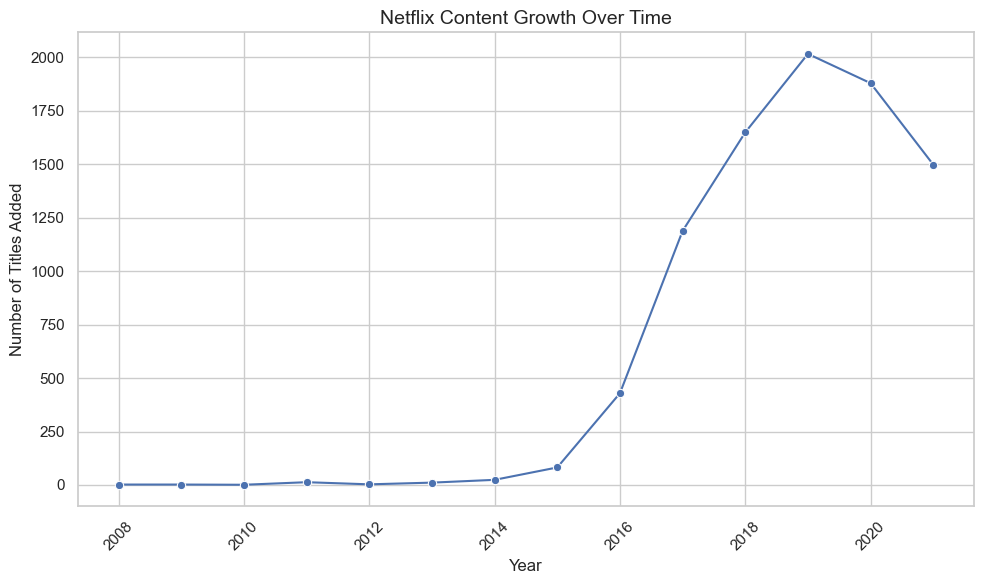

In [4]:
# Line plot of content growth
sns.lineplot(x=titles_by_year.index, y=titles_by_year.values, marker='o')

plt.title("Netflix Content Growth Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


As seen in the chart, Netflix’s content library grew exponentially, peaking over the years, from 2 films per year to 2000 films a year.


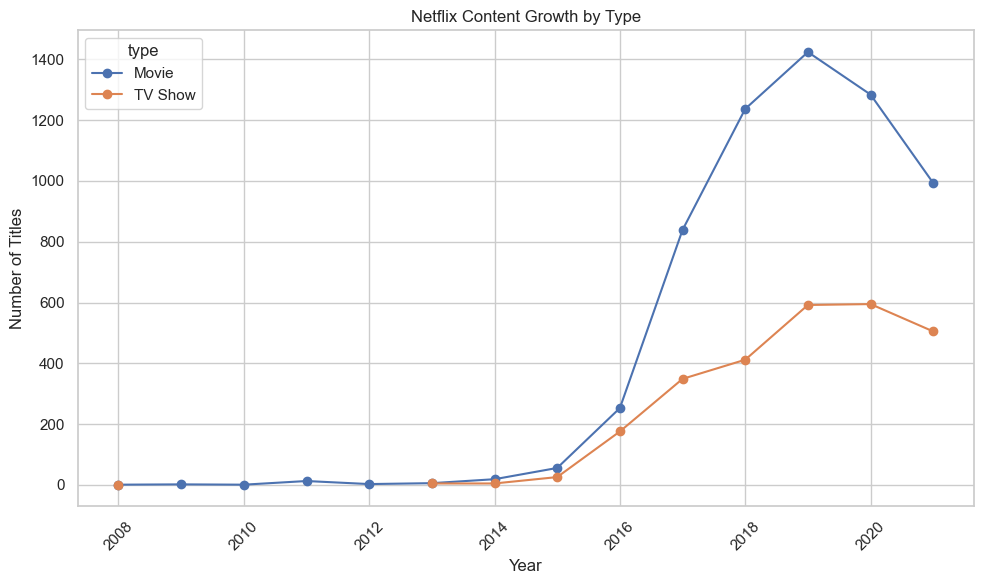

In [5]:
# Group by year and type (Movie or TV Show)
type_by_year = df_years.groupby(['year_added', 'type']).size().unstack()

# Plot both on the same chart
type_by_year.plot(kind='line', marker='o')
plt.title("Netflix Content Growth by Type")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Growth of Movies vs TV Shows

While Netflix has consistently expanded its content library, this chart highlights an interesting trend: Movies have consistently outpaced TV Shows in terms of volume. Both categories have grown significantly, reflecting the platform's broad strategy to cater to diverse viewer preferences.


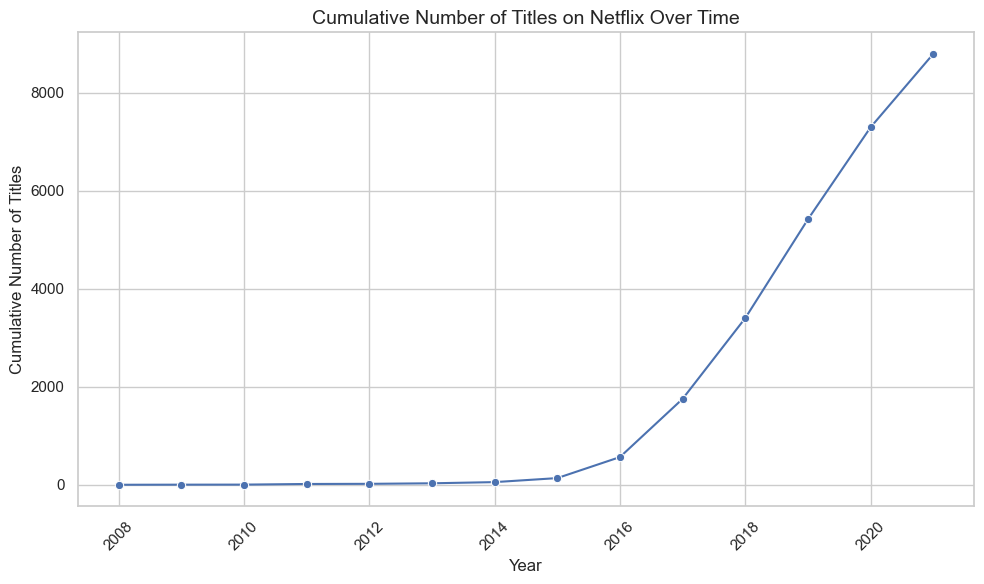

In [6]:
cumulative_titles = titles_by_year.cumsum()

# Plot cumulative growth
plt.figure(figsize=(10, 6))
sns.lineplot(x=cumulative_titles.index, y=cumulative_titles.values, marker='o')

plt.title("Cumulative Number of Titles on Netflix Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
